In [1]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import GetOldTweets3 as got
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap
import plotly_express as px

In [2]:
df1=pd.read_json("wfh1.json")
df2=pd.read_json("wfh2.json")
df3=pd.read_json("wfh3.json")

In [4]:
frames = [df1,df2,df3]
tw_df = pd.concat(frames)
tw_df

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,True,"[WorkFromHome, MakeMoneyOnlinepic]",[https://pbs.twimg.com/media/ERaxbEaWkAIb7mh.jpg],False,False,1,[http://bit.ly/WebScript],,0,[],...,davidndana,[BLOGPOST] Use this 7-Step Webinar Framework f...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:54:16,2020-02-22 23:54:16,1231366628417429504,/davidndana/status/1231366628417429506,845037806737129472,David & Dana,
1,False,"[remotejobs, workfromhome]",[],False,False,2,[http://bit.ly/39UTRxv],,0,[],...,NotNowMomsBusy,StubHub is looking for remote Customer Service...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:50:02,2020-02-22 23:50:02,1231365562946793472,/NotNowMomsBusy/status/1231365562946793472,1921022984,Cori Ramos,
2,False,"[WorkFromHome, WorkatHome, remotework]",[],False,False,1,[https://jobs.lever.co/asmarterwindow/22463992...,,0,[],...,WorkAtHomeWrap,**MA/RI OPPORTUNITY**\n\nINSIDE SALES-WORK FRO...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:47:44,2020-02-22 23:47:44,1231364982782210048,/WorkAtHomeWrap/status/1231364982782210048,1216728553515077632,workathomewrap,
3,True,"[Surveys, paidsurveys, surveysformoney, makemo...",[https://pbs.twimg.com/media/ERau4zfX0AUBQLT.jpg],False,False,0,[http://tiny.cc/Paid-Online-Survey],,0,[],...,Darksith100,Fast and easy way to make extra money online s...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:43:21,2020-02-22 23:43:21,1231363880238174208,/Darksith100/status/1231363880238174209,938833816294215680,David,
4,False,"[MakeMoney, WorkFromHome]",[],False,False,0,[http://money.video/youtube2],,0,[],...,davidndana,Which Strategies Do You Use to Make Money in Y...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:37:15,2020-02-22 23:37:15,1231362345936572416,/davidndana/status/1231362345936572417,845037806737129472,David & Dana,
5,False,"[pups, pupdate, coding, smallbusiness, workfro...",[],False,False,0,[https://www.instagram.com/p/B840k-snFjD/?igsh...,,0,[],...,bradcypert,Living the dream. #pups #pupdate #coding #smal...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:36:51,2020-02-22 23:36:51,1231362243511623680,/bradcypert/status/1231362243511623680,295811772,𝙱𝚛𝚊𝚍 𝙲𝚢𝚙𝚎𝚛𝚝,
6,True,"[matchedbetting, money, cash, freebets, free, ...",[https://pbs.twimg.com/media/ERasMZrXkAMqpaW.jpg],False,False,1,[http://bit.ly/profitaccumulatorfreetrial1],,0,[],...,Darksith100,**Matched Betting** - Link to FREE TRIAL to Pr...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:31:50,2020-02-22 23:31:50,1231360983760809984,/Darksith100/status/1231360983760809986,938833816294215680,David,
7,False,[],[],False,False,0,[],,0,[],...,EbooksTim,Can I WFH from NZ to watch tennis but a little...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:31:24,2020-02-22 23:31:24,1231360872485937152,/EbooksTim/status/1231360872485937152,1000330881700061184,TimLChan Ebooks - EbooksTim,
8,True,"[gaming, tekken, workfromhome]",[https://pbs.twimg.com/media/ERar4tYX0AISYZF.jpg],False,False,1,[http://marc2020.behelit777.a.clickbetter.com],,0,[],...,JamesKeele7,EARN MONEY WHILE GAMING!!!\nhttp://marc2020.be...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:30:05,2020-02-22 23:30:05,1231360541525970944,/JamesKeele7/status/1231360541525970944,1224797216595836928,James Keele,
9,False,"[workfromhome, onlinejobs, futureofwork]",[],True,False,9,[https://bit.ly/2w4oJge],,1,[],...,KenzieAcademy,The future of work will largely be a remote on...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-22 23:30:04,2020-02-22 23:30:04,1231360536899735552,/KenzieAcademy/status/1231360536899735554,879389477973639168,Kenzie Academy,


In [5]:
df = tw_df[['hashtags','timestamp','text','screen_name','likes','retweets']]
df = df.reset_index()
df

,index,hashtags,timestamp,text,screen_name,likes,retweets
0,0,"[WorkFromHome, MakeMoneyOnlinepic]",2020-02-22 23:54:16,[BLOGPOST] Use this 7-Step Webinar Framework f...,davidndana,1,0
1,1,"[remotejobs, workfromhome]",2020-02-22 23:50:02,StubHub is looking for remote Customer Service...,NotNowMomsBusy,2,2
2,2,"[WorkFromHome, WorkatHome, remotework]",2020-02-22 23:47:44,**MA/RI OPPORTUNITY**\n\nINSIDE SALES-WORK FRO...,WorkAtHomeWrap,1,0
3,3,"[Surveys, paidsurveys, surveysformoney, makemo...",2020-02-22 23:43:21,Fast and easy way to make extra money online s...,Darksith100,0,0
4,4,"[MakeMoney, WorkFromHome]",2020-02-22 23:37:15,Which Strategies Do You Use to Make Money in Y...,davidndana,0,0
5,5,"[pups, pupdate, coding, smallbusiness, workfro...",2020-02-22 23:36:51,Living the dream. #pups #pupdate #coding #smal...,bradcypert,0,1
6,6,"[matchedbetting, money, cash, freebets, free, ...",2020-02-22 23:31:50,**Matched Betting** - Link to FREE TRIAL to Pr...,Darksith100,1,0
7,7,[],2020-02-22 23:31:24,Can I WFH from NZ to watch tennis but a little...,EbooksTim,0,0
8,8,"[gaming, tekken, workfromhome]",2020-02-22 23:30:05,EARN MONEY WHILE GAMING!!!\nhttp://marc2020.be...,JamesKeele7,1,0
9,9,"[workfromhome, onlinejobs, futureofwork]",2020-02-22 23:30:04,The future of work will largely be a remote on...,KenzieAcademy,9,1


In [7]:
# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['text']]

In [13]:
#classifying sentiments as positive,negative and neutral
def sentiment(compound):
    res = ""
    if(compound >= 0.05):
        res="Positive"
    elif(compound <= - 0.05):
        res="Negative"
    else:
        res="Neutral"
    return res

df['Sentiment'] = df['compound'].apply(lambda x: sentiment(x))

In [14]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

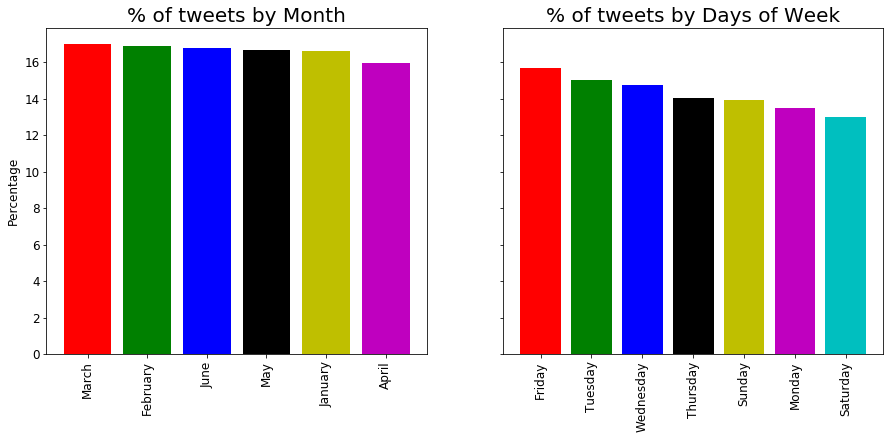

In [15]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df["monthName"] = df.timestamp.dt.month_name()
data = df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month')

df["dayName"] = df.timestamp.dt.day_name()
data = df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()

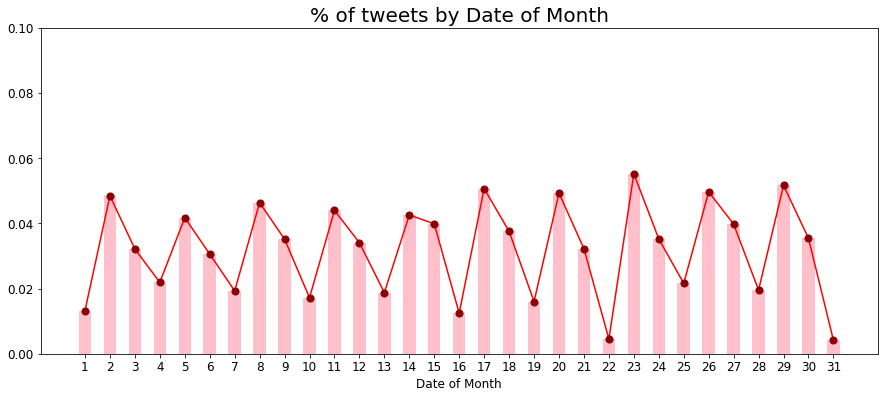

In [16]:
fig, axes = plt.subplots(figsize=(15,6))
df["dayOfMonth"] = df.timestamp.dt.day
data = df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of tweets by Date of Month')

plt.show()

In [17]:
import string
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text_rc) #remove urls
    nopunc = re.sub(r'http\S+', '', nopunc) #remove usernames
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc) #remove hashtags
    nopunc= re.sub(r'(.)\1+', r'\1\1', nopunc)  #remove repeating characters 
    tokens = re.split('\W+', nopunc)    # tokenization
    text = [word for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['text'].apply(lambda x: clean_text(x))

In [18]:
pos_df=df[df.Sentiment=='Positive']
neg_df=df[df.Sentiment=='Negative']
neu_df=df[df.Sentiment=='Neutral']

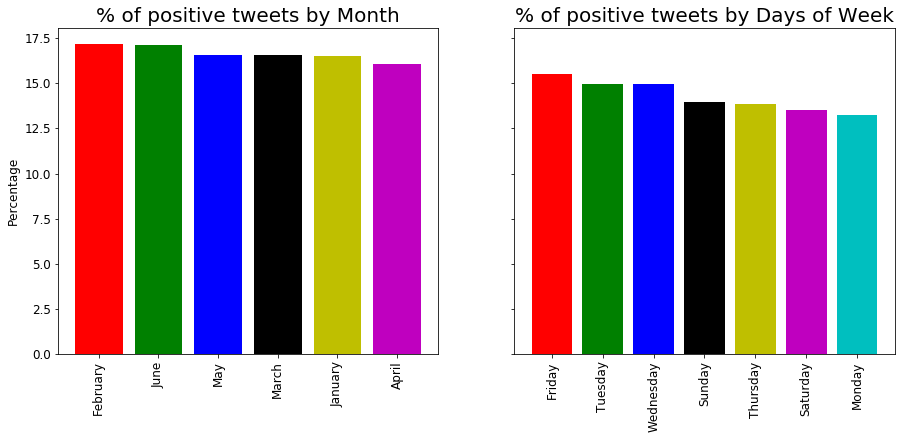

In [19]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = pos_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of positive tweets by Month')

data = pos_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of positive tweets by Days of Week')

plt.show()

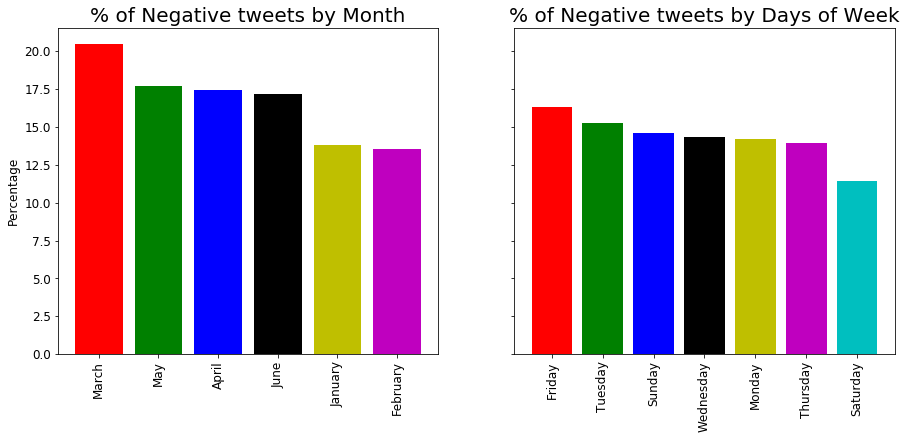

In [20]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neg_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Negative tweets by Month')

data = neg_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Negative tweets by Days of Week')

plt.show()

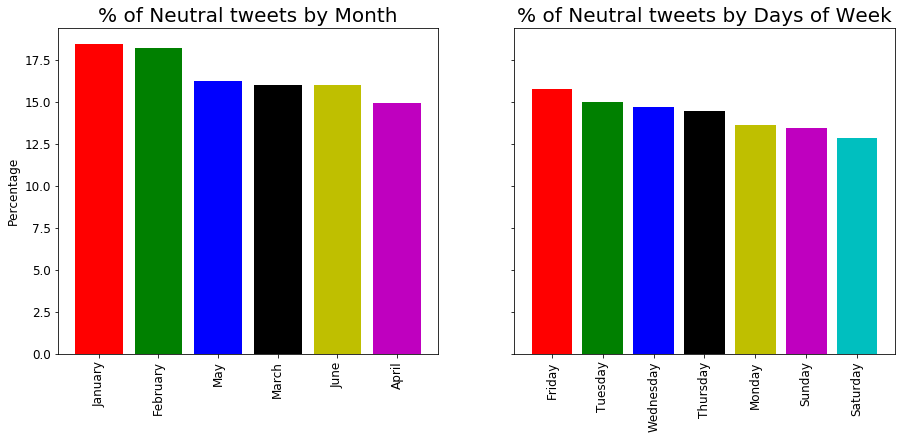

In [21]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neu_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neutral tweets by Month')

data = neu_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Neutral tweets by Days of Week')

plt.show()

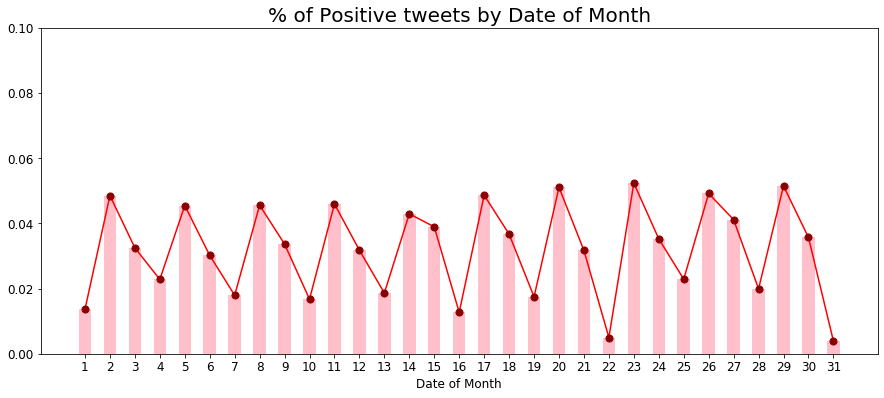

In [22]:
fig, axes = plt.subplots(figsize=(15,6))
data = pos_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Positive tweets by Date of Month')

plt.show()

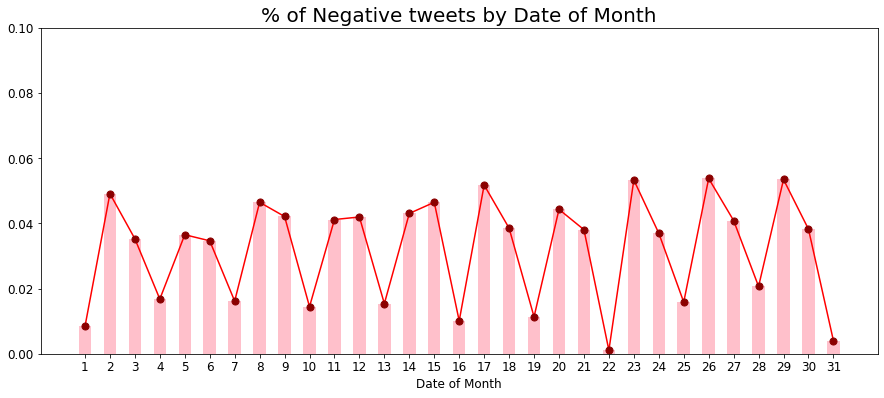

In [23]:
fig, axes = plt.subplots(figsize=(15,6))
data = neg_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Negative tweets by Date of Month')

plt.show()

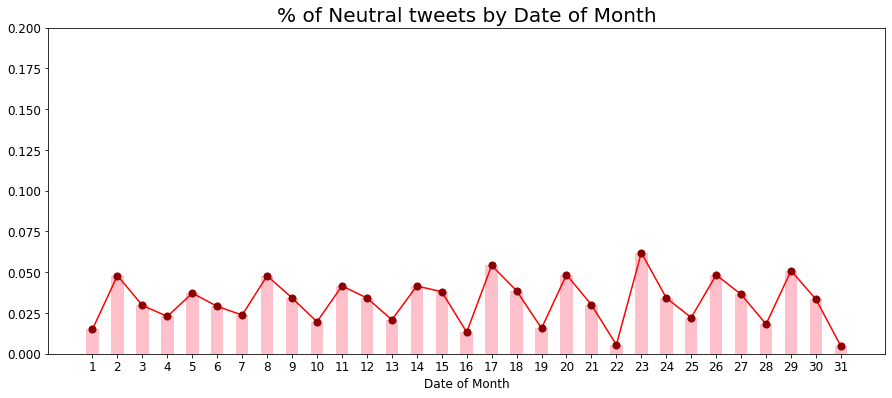

In [24]:
fig, axes = plt.subplots(figsize=(15,6))
data = neu_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.2)
axes.set_title('% of Neutral tweets by Date of Month')

plt.show()

In [25]:
consumer_key ='BZCiEnipIjwlIr5qdFawFL7Ka'
consumer_secret ='UTHnBo6nzb5HhsQGoFxjEHBHArDAlT9VyXx8x98AObzpV6iArr'
access_key ='757468675414695936-wVM842i23t6yTUDhbwuKkH92LGnZRAq'
access_secret ='TEFpzrCMH8aYl7YURiygG6Mgk76BAM9tLNWagI8JBAHiZ'

In [26]:
from tweepy import OAuthHandler
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [27]:
def get_location(username):
    try:
        userOBJ =api.get_user(username)
        res= userOBJ.location
    except:
        res= "user suspended"
    return res

In [28]:
df['location']=df['screen_name'].apply(lambda x: get_location(x))
df

,hashtags,timestamp,text,screen_name,likes,retweets,compound,Sentiment,monthName,dayName,dayOfMonth,Text_cleaned,location
0,"[WorkFromHome, MakeMoneyOnlinepic]",2020-02-22 23:54:16,[BLOGPOST] Use this 7-Step Webinar Framework f...,davidndana,1,0,0.0000,Neutral,February,Saturday,22,"[blogpost, use, step, webinar, framework, flas...","Chapala, Jalisco Mexico"
1,"[remotejobs, workfromhome]",2020-02-22 23:50:02,StubHub is looking for remote Customer Service...,NotNowMomsBusy,2,2,0.3818,Positive,February,Saturday,22,"[stubhub, looking, remote, customer, service, ...","Houston, Texas"
2,"[WorkFromHome, WorkatHome, remotework]",2020-02-22 23:47:44,**MA/RI OPPORTUNITY**\n\nINSIDE SALES-WORK FRO...,WorkAtHomeWrap,1,0,0.7865,Positive,February,Saturday,22,"[mari, opportunity, inside, saleswork, home, r...",
3,"[Surveys, paidsurveys, surveysformoney, makemo...",2020-02-22 23:43:21,Fast and easy way to make extra money online s...,Darksith100,0,0,0.7418,Positive,February,Saturday,22,"[fast, easy, way, make, extra, money, online, ...",United Kingdom
4,"[MakeMoney, WorkFromHome]",2020-02-22 23:37:15,Which Strategies Do You Use to Make Money in Y...,davidndana,0,0,0.0000,Neutral,February,Saturday,22,"[strategies, use, make, money, home, business,...","Chapala, Jalisco Mexico"
5,"[pups, pupdate, coding, smallbusiness, workfro...",2020-02-22 23:36:51,Living the dream. #pups #pupdate #coding #smal...,bradcypert,0,1,0.2500,Positive,February,Saturday,22,"[living, dream, pups, pupdate, coding, smallbu...","Jeffersonville, IN"
6,"[matchedbetting, money, cash, freebets, free, ...",2020-02-22 23:31:50,**Matched Betting** - Link to FREE TRIAL to Pr...,Darksith100,1,0,0.9556,Positive,February,Saturday,22,"[matched, betting, link, free, trial, profit, ...",United Kingdom
7,[],2020-02-22 23:31:24,Can I WFH from NZ to watch tennis but a little...,EbooksTim,0,0,0.8242,Positive,February,Saturday,22,"[wfh, nz, watch, tennis, little, bit, better, ...",A server somewhere
8,"[gaming, tekken, workfromhome]",2020-02-22 23:30:05,EARN MONEY WHILE GAMING!!!\nhttp://marc2020.be...,JamesKeele7,1,0,0.0000,Neutral,February,Saturday,22,"[earn, money, gaming, gaming, tekken, workfrom...",california
9,"[workfromhome, onlinejobs, futureofwork]",2020-02-22 23:30:04,The future of work will largely be a remote on...,KenzieAcademy,9,1,-0.5106,Negative,February,Saturday,22,"[future, work, largely, remote, one, pop, grou...","Indiana, USA"


In [29]:
df.to_csv('../Datasets/WFH_all.csv')